<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-8/blob/main/i_audio_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install librosa
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.3 MB/s eta 0:00:00


In [4]:
!pip install librosa
!pip install matplotlib
!pip install IPython
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import glob
from IPython.display import Audio
import librosa.display

In [14]:
# Function to extract MFCC features from audio file
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None
    return mfccs_processed

# Function to play an audio file
def play_audio(file_path):
    return Audio(file_path)

# Function to plot a waveplot
def plot_wave(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f"Waveplot - {remove_prefix_path(file_name)}")
    plt.show()

# Function to plot a spectrogram
def plot_spectrogram(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {remove_prefix_path(file_name)}")
    plt.show()

# Function to plot MFCCs
def plot_mfccs(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs - {remove_prefix_path(file_name)}")
    plt.show()

# Function to remove prefixes from paths to better show file names
def remove_prefix_path(input_str):
  prefix_path = "/content/drive/MyDrive/dm-assignment-6/cats_dogs"
  output = input_str.removeprefix(prefix_path)
  return output


In [15]:
audio_files = glob.glob("/content/drive/MyDrive/dm-assignment-6/cats_dogs/*.wav")

In [16]:
features = []

for file in audio_files:
    data = extract_features(file)
    if data is not None:
        features.append([data, file])

In [19]:
X = np.array([item[0] for item in features])
y = np.array([item[1] for item in features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.26025480031967163


Analyzing Cluster 1
File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/cat_62.wav


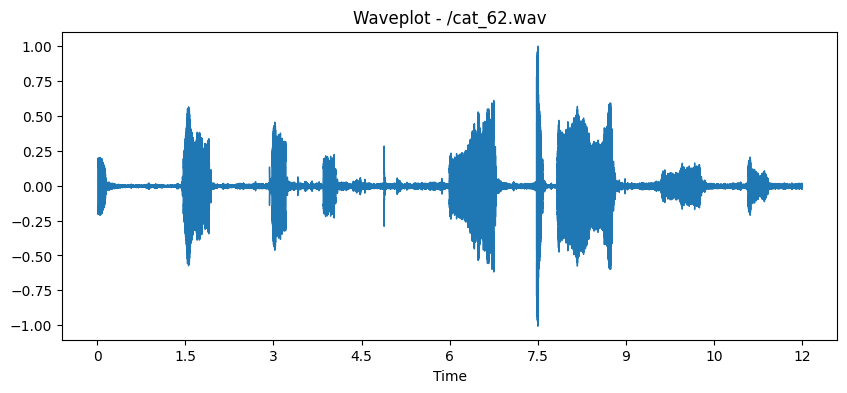

File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/cat_69.wav


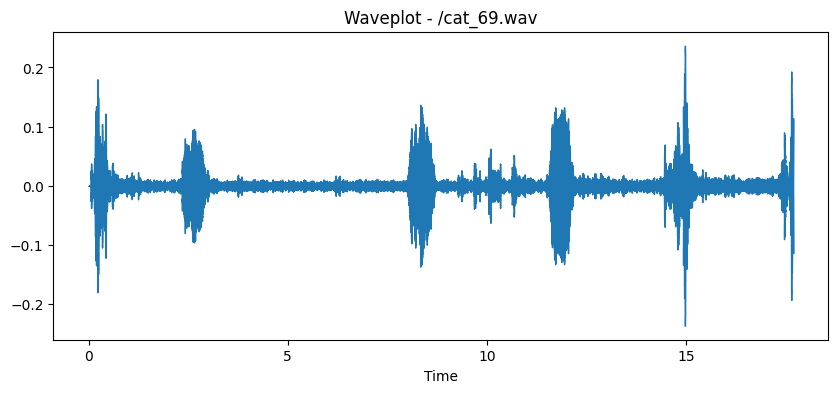

File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/cat_63.wav


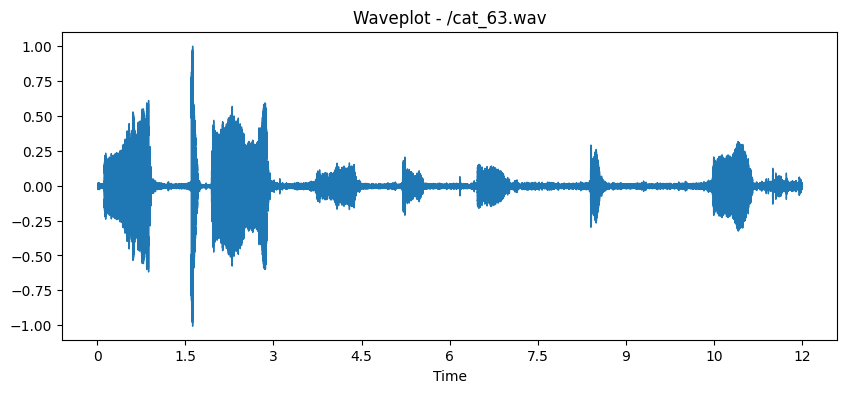

File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/cat_61.wav


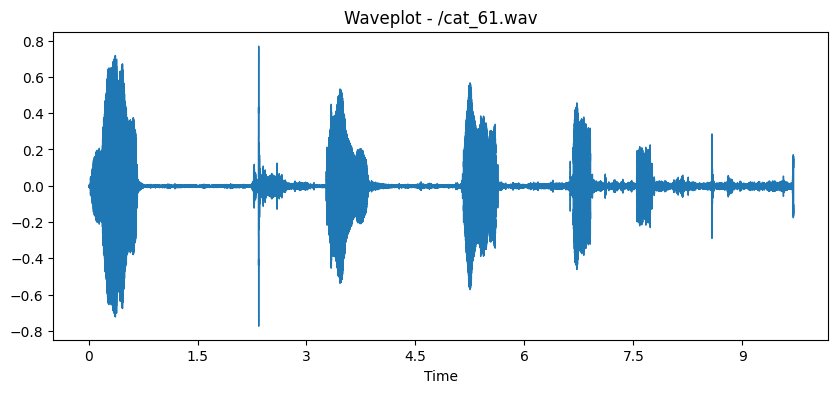


--------------------------------------------------

Analyzing Cluster 2
File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/dog_barking_86.wav


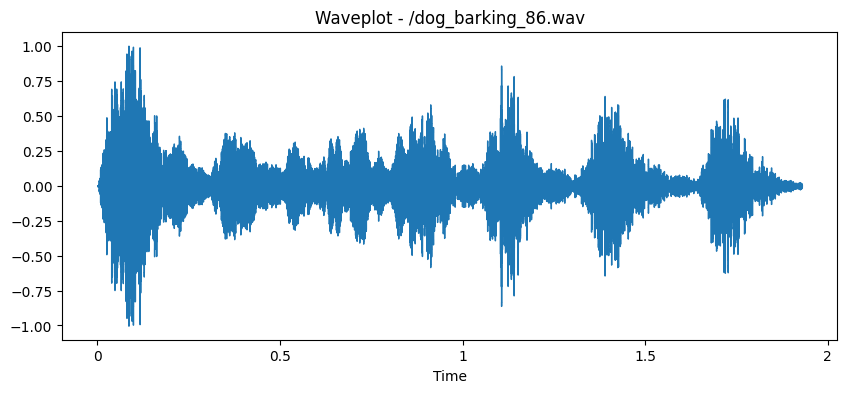

File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/dog_barking_84.wav


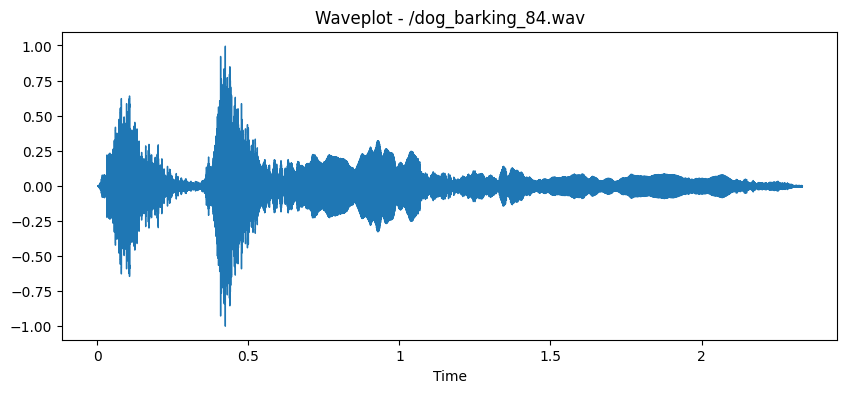

File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/dog_barking_78.wav


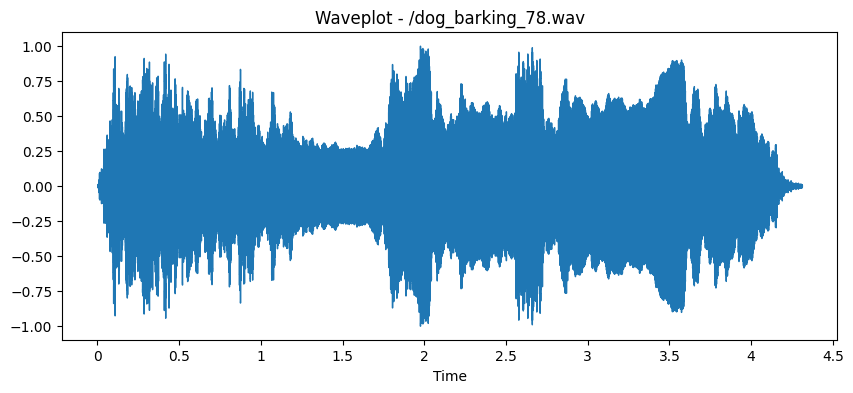

File: /content/drive/MyDrive/dm-assignment-6/cats_dogs/dog_barking_76.wav


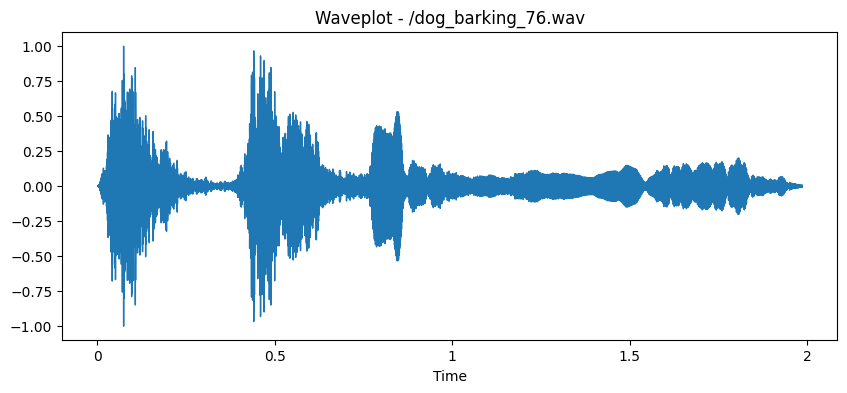


--------------------------------------------------



In [22]:

for i in range(2): # for each cluster
    print(f"Analyzing Cluster {i+1}")
    cluster_indices = np.where(y_kmeans == i)[0][:4]  # Take first 5 samples from each cluster for analysis
    for idx in cluster_indices:
        file_name = audio_files[idx]
        print(f"File: {file_name}")
        display(play_audio(file_name))
        plot_wave(file_name)
    print("\n" + "-"*50 + "\n")